In [21]:
# Data : http://kdd.ics.uci.edu/databases/synthetic_control/synthetic_control.html

In [1]:
data <- read.table('synthetic_control.txt', header = F, sep = "")
str(data)

'data.frame':	600 obs. of  60 variables:
 $ V1 : num  28.8 24.9 31.4 25.8 27.2 ...
 $ V2 : num  34.5 25.7 30.6 30.5 29.2 ...
 $ V3 : num  31.3 27.6 26.4 35.4 33.7 ...
 $ V4 : num  31.3 32.8 24.3 25.6 25.6 ...
 $ V5 : num  28.9 27.9 27.9 28 24.7 ...
 $ V6 : num  33.8 31.6 28.5 25.3 28.9 ...
 $ V7 : num  25.4 31.5 25 28.1 35.8 ...
 $ V8 : num  27.8 35.5 32.4 29.4 34.9 ...
 $ V9 : num  35.2 28 25.2 31.5 24.6 ...
 $ V10: num  27.1 31.7 27.3 27.3 34.2 ...
 $ V11: num  32.9 27.5 31.8 29 28 ...
 $ V12: num  29.2 31.2 27.3 29 25.3 ...
 $ V13: num  36 27.5 28.3 30 35.4 ...
 $ V14: num  32.3 31.4 26.6 30.3 34.9 ...
 $ V15: num  34.5 27.8 24 30.4 25.1 ...
 $ V16: num  32.9 24.5 35.1 24.3 29.5 ...
 $ V17: num  34.1 27.6 31.6 24.3 33.2 ...
 $ V18: num  26.5 35.6 32.6 35.1 31.1 ...
 $ V19: num  27.7 35.4 31 25.4 31.4 ...
 $ V20: num  26.4 31.4 34.1 32.1 26.5 ...
 $ V21: num  25.8 30.7 26.9 33.3 28.6 ...
 $ V22: num  29.3 24.1 31.5 25 31.7 ...
 $ V23: num  30.7 35.1 35 35.3 35.9 ...
 $ V24: num  29.5

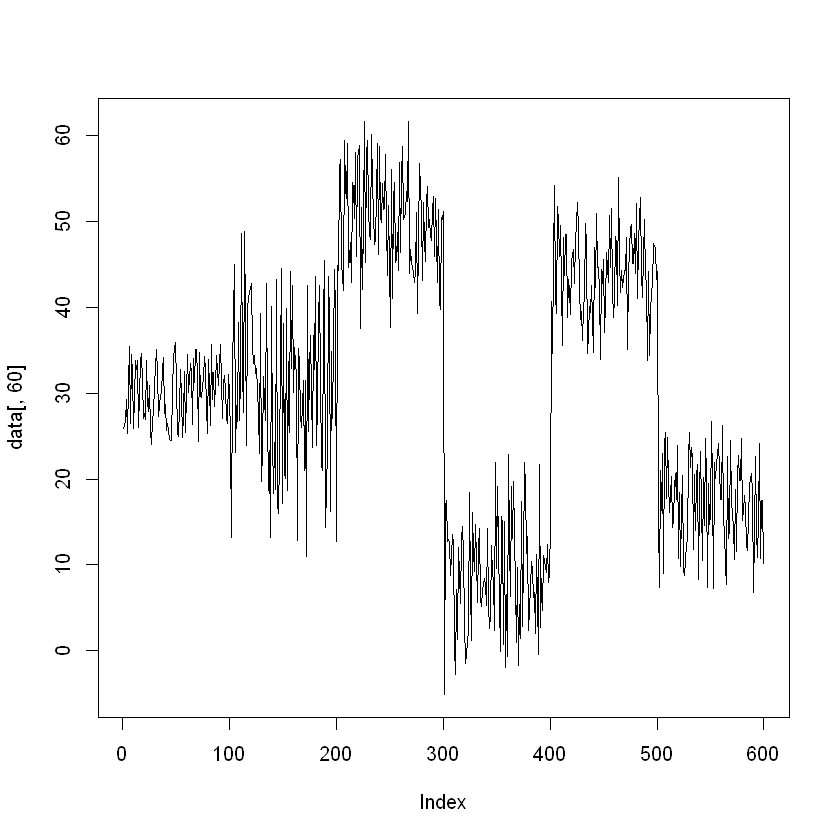

In [2]:
plot(data[,60], type = 'l')

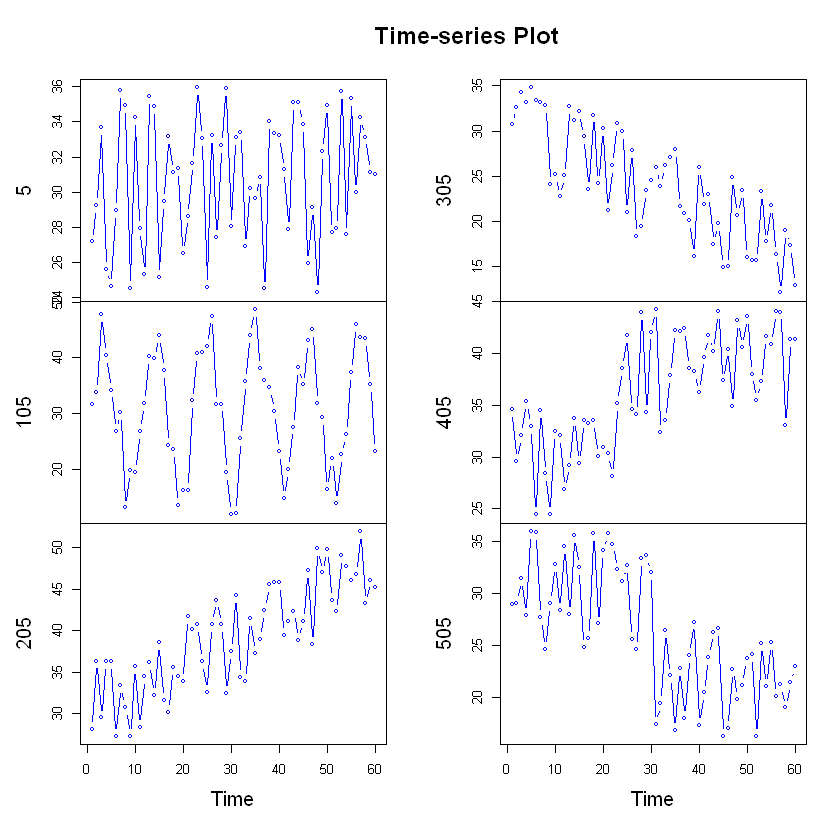

In [4]:

j <- c(5, 105, 205, 305, 405, 505)
sample <- t(data[j,])
plot.ts(sample,
        main = "Time-series Plot",
        col = 'blue',
        type = 'b')

In [5]:
# Data preparation
n <- 10
s <- sample(1:100, n)
i <- c(s,100+s, 200+s, 300+s, 400+s, 500+s)
d <- data[i,]
str(d)

'data.frame':	60 obs. of  60 variables:
 $ V1 : num  27.5 31.4 31.7 25 27.2 ...
 $ V2 : num  29.7 29.1 34.5 34.7 25.2 ...
 $ V3 : num  27.7 30.9 27.1 32.9 34.5 ...
 $ V4 : num  32.8 26 24.8 29 30.6 ...
 $ V5 : num  35.6 29.8 30.9 25 32 ...
 $ V6 : num  29.7 24.7 28.2 29.6 24.4 ...
 $ V7 : num  32.5 33.9 27.7 25.8 33.2 ...
 $ V8 : num  24.1 28.6 30.2 24.3 31.2 ...
 $ V9 : num  33 31.1 28.1 35.5 35.6 ...
 $ V10: num  25.8 29.4 24.3 24.1 33.9 ...
 $ V11: num  33.8 31.7 30.3 27 26.4 ...
 $ V12: num  31.3 30.3 34.8 35.2 27.5 ...
 $ V13: num  26.9 30.9 24.9 28.5 31 ...
 $ V14: num  32.6 30.8 28.8 24.1 33.9 ...
 $ V15: num  30.7 35.6 24.2 30.1 33.2 ...
 $ V16: num  30.6 33.3 28 30.2 30.5 ...
 $ V17: num  29.8 29.1 28.9 28.9 26.7 ...
 $ V18: num  35.9 29.7 24.5 25.8 25 ...
 $ V19: num  24.2 24.4 27.5 31 28.3 ...
 $ V20: num  29.2 31.4 29.2 35.6 34.8 ...
 $ V21: num  32.2 31.1 34.1 28 24 ...
 $ V22: num  35.7 31.4 24.7 30.6 30.2 ...
 $ V23: num  34.6 32.1 32.8 34.9 35.1 ...
 $ V24: num  32.8 30

In [6]:
pattern <- c(rep('Normal', n),
             rep('Cyclic', n),
             rep('Increasing trend', n),
             rep('Decreasing trend', n),
             rep('Upward shift', n),
             rep('Downward shift', n))

In [11]:
# Calculate distances
library(dtw)
distance <- dist(d, method = "DTW")

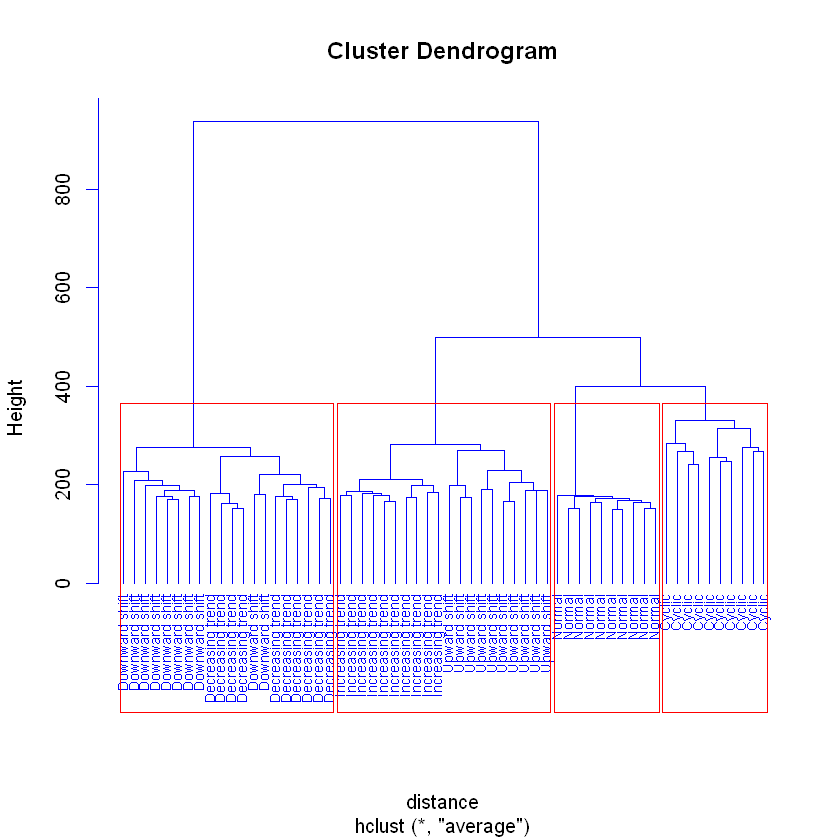

In [20]:
# Hierarchical clustering
hc <- hclust(distance, method = 'average')
plot(hc,
     labels = pattern,
     cex = 0.7,
     hang = -1,
     col = 'blue')
rect.hclust(hc, k=4)

## Time series classification

In [13]:
# Data preparation
pattern100 <- c(rep('Normal', 100),
                rep('Cyclic', 100),
                rep('Increasing trend', 100),
                rep('Decreasing trend', 100),
                rep('Upward shift', 100),
                rep('Downward shift', 100))
newdata <- data.frame(data, pattern100)
str(newdata)

'data.frame':	600 obs. of  61 variables:
 $ V1        : num  28.8 24.9 31.4 25.8 27.2 ...
 $ V2        : num  34.5 25.7 30.6 30.5 29.2 ...
 $ V3        : num  31.3 27.6 26.4 35.4 33.7 ...
 $ V4        : num  31.3 32.8 24.3 25.6 25.6 ...
 $ V5        : num  28.9 27.9 27.9 28 24.7 ...
 $ V6        : num  33.8 31.6 28.5 25.3 28.9 ...
 $ V7        : num  25.4 31.5 25 28.1 35.8 ...
 $ V8        : num  27.8 35.5 32.4 29.4 34.9 ...
 $ V9        : num  35.2 28 25.2 31.5 24.6 ...
 $ V10       : num  27.1 31.7 27.3 27.3 34.2 ...
 $ V11       : num  32.9 27.5 31.8 29 28 ...
 $ V12       : num  29.2 31.2 27.3 29 25.3 ...
 $ V13       : num  36 27.5 28.3 30 35.4 ...
 $ V14       : num  32.3 31.4 26.6 30.3 34.9 ...
 $ V15       : num  34.5 27.8 24 30.4 25.1 ...
 $ V16       : num  32.9 24.5 35.1 24.3 29.5 ...
 $ V17       : num  34.1 27.6 31.6 24.3 33.2 ...
 $ V18       : num  26.5 35.6 32.6 35.1 31.1 ...
 $ V19       : num  27.7 35.4 31 25.4 31.4 ...
 $ V20       : num  26.4 31.4 34.1 32.1 26.5 ...

In [16]:
# Classification with decision tree

library(party)
tree <- ctree(pattern100~., newdata)


In [18]:
# Classification performance
tab <- table(Predicted = predict(tree, newdata), Actual = newdata$pattern100)
tab
sum(diag(tab))/sum(tab)

                  Actual
Predicted          Cyclic Decreasing trend Downward shift Increasing trend
  Cyclic               97                0              3                0
  Decreasing trend      0               99              8                0
  Downward shift        0                1             89                0
  Increasing trend      2                0              0               96
  Normal                1                0              0                0
  Upward shift          0                0              0                4
                  Actual
Predicted          Normal Upward shift
  Cyclic                0            0
  Decreasing trend      0            0
  Downward shift        0            0
  Increasing trend      0            6
  Normal              100            4
  Upward shift          0           90

[1] 0.9516667